# Titanic Survival Prediction Project
**Author:** Eric Meyer

**Date:** 03/26/2025  

**Introduction:** In this project, we will use the Titanic dataset to predict the survival of passengers based on various input features. The dataset provides information on attributes such as age, sex, and class of the passengers, which will be used to train machine learning models to predict whether a passenger survived or not.


## Section 1: Import and Inspect the Data

In [2]:
# Importing the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC

In [3]:
# Load Titanic dataset directly from seaborn library
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [5]:
# Impute missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill in missing values for embark_town using the mode:
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

- Add family_size - number of family members on board
- Convert categorical "sex" to numeric
- Convert categorical "embarked" to numeric
- Binary feature - convert "alone" to numeric

In [6]:
# Create new features based on existing columns
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)



## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

We will choose different combinations of features for the analysis, with the target variable being the "survived" column.

- Case 1: Input Features: alone, Target: survived

- Case 2: Input Features: age, Target: survived

- Case 3: Input Features: age and family_size, Target: survived

In [7]:
# Case 1: alone only
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size
# X = titanic[['age', 'family_size']]
# y = titanic['survived']

### Reflection 3:

- Why were these features selected?
<br> **The selected features like "alone", "age", and "family_size" are expected to influence survival likelihood, as they can reflect a passenger's social situation and age group.**

- Are there features that are likely to be highly predictive of survival?
<br> **Features like "sex", "class", and "age" are known to be strong predictors of survival based on historical data.**

## Section 4: Train a Classification Model (Decision Tree)

### 4.1 Split the Data

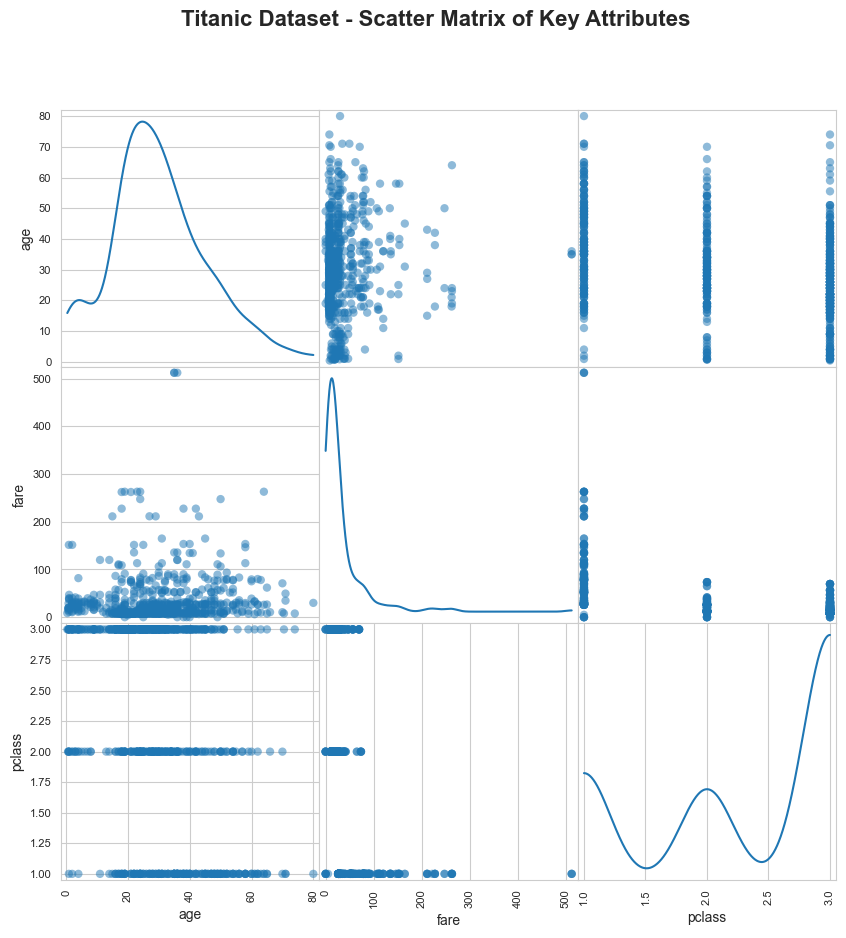

In [ ]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


#### Create a scatter plot of age vs fare, colored by gender:

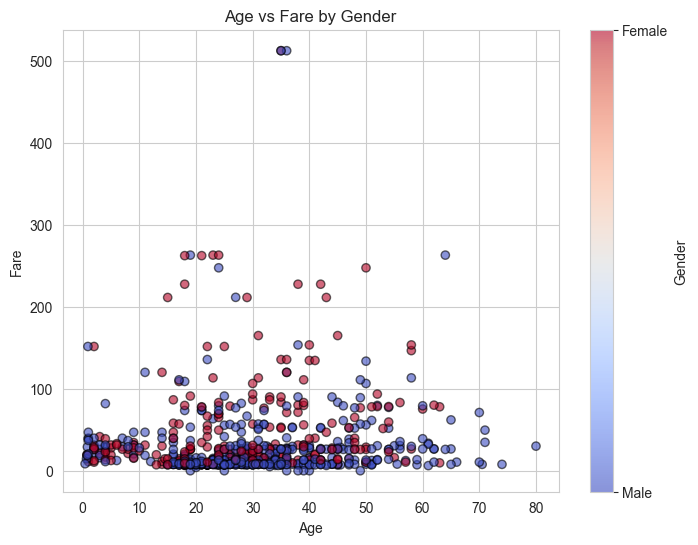

In [43]:
# Define color mapping: 0 = male (blue), 1 = female (red)
gender_colors = data_frame['sex'].apply(lambda x: 0 if x == 'male' else 1)

# Create scatter plot with a colormap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_frame['age'], data_frame['fare'], 
    c=gender_colors, cmap='coolwarm', alpha=0.6, edgecolors='k'
)

# Add labels
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')

# Add a colorbar legend
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label("Gender")
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Male", "Female"])

plt.show()

#### Create a histogram of age:

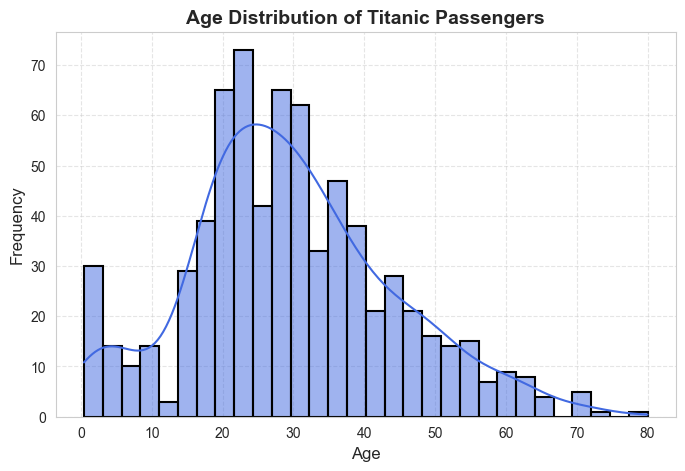

In [44]:
# Set a visually appealing Seaborn style
sns.set_style("whitegrid")

# Create histogram with improved styling
plt.figure(figsize=(8, 5))
sns.histplot(
    data_frame['age'].dropna(),
    kde=True, 
    bins=30,
    color="royalblue",
    linewidth=1.5,
    edgecolor="black"
)

# Add title and labels with styling
plt.title('Age Distribution of Titanic Passengers', fontsize=14, fontweight="bold")
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve readability with grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Create a count plot for class and survival:

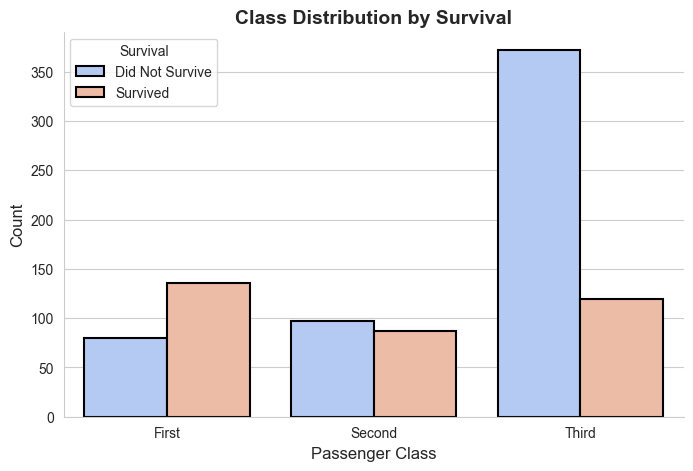

In [45]:
# Set a stylish Seaborn theme
sns.set_style("whitegrid")

# Create a countplot with better aesthetics
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="class", hue="survived", data=data_frame, 
    palette="coolwarm",
    edgecolor="black", linewidth=1.5
)

# Add labels and title with styling
plt.title('Class Distribution by Survival', fontsize=14, fontweight="bold")
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize legend for clarity
legend_labels = ['Did Not Survive', 'Survived']
plt.legend(title="Survival", labels=legend_labels, fontsize=10)

# Improve layout readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.show()

#### Reflection 2.1 What patterns or anomalies do you notice?

It seems more females paid higher fares.

Heavy amount of population between 20 and 35 years of age.

By far the largest grou not to survive are from the third class.

#### 2.2 Handle Missing Values and Clean Data

Age was missing values. We can impute missing values for age using the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)
Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [46]:
# Replacing nulls in age to median
data_frame['age'].fillna(data_frame['age'].median(), inplace=True)

# Replacing nulls in embark_town with mode
data_frame['embark_town'].fillna(data_frame['embark_town'].mode()[0], inplace=True)

C:\Users\Lexi\AppData\Local\Temp\ipykernel_18104\2513142199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['age'].fillna(data_frame['age'].median(), inplace=True)
C:\Users\Lexi\AppData\Local\Temp\ipykernel_18104\2513142199.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

#### 2.3 Feature Engineering

Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

Convert categorical data to numeric:

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

In [47]:
# Create a new feature: Family size
data_frame['family_size'] = data_frame['sibsp'] + data_frame['parch'] + 1

#Convert categorical data to numeric:

data_frame['sex'] = data_frame['sex'].map({'male': 0, 'female': 1})
data_frame['embarked'] = data_frame['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Create a binary feature for 'alone':
data_frame['alone'] = data_frame['alone'].astype(int)

#### Reflection 2.3

Why might family size be a useful feature for predicting survival? **Family size can be an important feature because it captures social dynamics that could influence survival chances:**

- Higher Survival Rates for Families – Passengers traveling in families may have had a higher chance of survival due to group decision-making, protection, and priority boarding lifeboats together (especially women and children).
- Lower Survival for Large Families – On the other hand, very large families might have struggled to get everyone onto lifeboats, reducing their survival chances.
- Solo Travelers Were at a Disadvantage – Individuals traveling alone might not have received help or support, leading to a lower survival rate.

Why convert categorical data to numeric? **Machine learning models work with numbers, so categorical data must be converted into a numerical format for effective analysis.**

 

In [48]:
# Check available columns
print(data_frame.columns)

# Ensure column names are correct before selecting features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

# Handle missing values properly
data_frame['age'] = data_frame['age'].fillna(data_frame['age'].median())
data_frame['embark_town'] = data_frame['embark_town'].fillna(data_frame['embark_town'].mode()[0])

# Select valid columns
df_X = data_frame[features]


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')


### Section 3: Feature Selection and Justification

#### 3.1 Choose features and target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Classification: Categorical target variable (e.g., gender, species).
Justify your selection with reasoning.
 

For classification, we’ll use survived as the target variable.

Input features: age, fare, pclass, sex, family_size
Target: survived

#### 3.2 Define X and y

Assign input features to X
Assign target variable to y (as applicable)

In [49]:
# Load data (assuming data_frame is already defined)
data_frame['family_size'] = data_frame['sibsp'] + data_frame['parch']

# Define features (X) and target (y)
X = data_frame[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = data_frame['survived']

# Convert categorical variable (sex) into numerical representation
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

#### Reflection 3:

**Why are these features selected?**

These features are selected because they represent status (pclass, fare), demographics (age, sex), and social connections (family_size), all of which can play a big role in survival outcomes.

**Are there any features that are likely to be highly predictive of survival?**

Sex: Women had a significantly higher survival rate than men due to the "women and children first" policy.

Pclass: First-class passengers had a much higher survival rate than third-class passengers.

Fare: Higher fare values often indicate first-class tickets, which correlate with better survival chances.

Family Size: Larger families may have had a harder time staying together, but small family groups may have had an advantage.

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

Basic Train/Test split 
 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(train_set))
print('Test size:', len(test_set))

### Basic Train/Test split & Stratified Train/Test split

### Compare Results

In [50]:

# Basic Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Stratified Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train_strat = X.iloc[train_indices]
    X_test_strat = X.iloc[test_indices]
    y_train_strat = y.iloc[train_indices]
    y_test_strat = y.iloc[test_indices]

# Compare distributions
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Basic Test Set Class Distribution:\n", y_test.value_counts(normalize=True))
print("\nStratified Train Set Class Distribution:\n", y_train_strat.value_counts(normalize=True))
print("Stratified Test Set Class Distribution:\n", y_test_strat.value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Train Set Class Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
Basic Test Set Class Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Train Set Class Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Stratified Test Set Class Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


#### Reflection 4:

**Why might stratification improve model performance?**

Stratification ensures that the class proportions in both the training and test sets match the original dataset. This prevents the model from being biased toward overrepresented classes and improves generalization.

**How close are the training and test distributions to the original dataset?**

The stratified split produces train and test sets that much more closely match the original class distribution. The basic split introduces some imbalance, especially in the test set, which could affect model performance. 

**Which split method produced better class balance?**

Stratified Shuffle Split performed better.